# Pipeline Performance Analysis


* Module Name: performance.ipynb
* Description: Evaluate the performance of the Pipeline runner

Copyright (C) 2025 J.Cincotta

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program. If not, see <https://www.gnu.org/licenses/>.


In [5]:
from welfareobs.utils.performance_monitor import PerformanceMonitor
from welfareobs.runner import Runner
from welfareobs.utils.config import Config
import matplotlib.pyplot as plt
import pandas as pd
import statistics


df = pd.read_csv("performance.csv")

df.info()
print(df.describe())
print(df.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   run     311 non-null    int64  
 1   time    311 non-null    float64
 2   sum     311 non-null    float64
 3   avg     311 non-null    float64
 4   med     311 non-null    float64
 5   sd      311 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.7 KB
                 run        time         sum         avg         med  \
count     311.000000  311.000000  311.000000  311.000000  311.000000   
mean    34677.607717    2.469864    6.744607    2.263241    1.776470   
std     50450.655845   11.260438   18.719975    7.988185    6.724792   
min         0.000000    0.071334    0.095181    0.095181    0.088525   
25%         1.000000    0.096951    0.908805    0.098221    0.095776   
50%         3.000000    0.380413    1.818934    0.380413    0.380413   
75%    107815.500000    0.518702    4.246347 

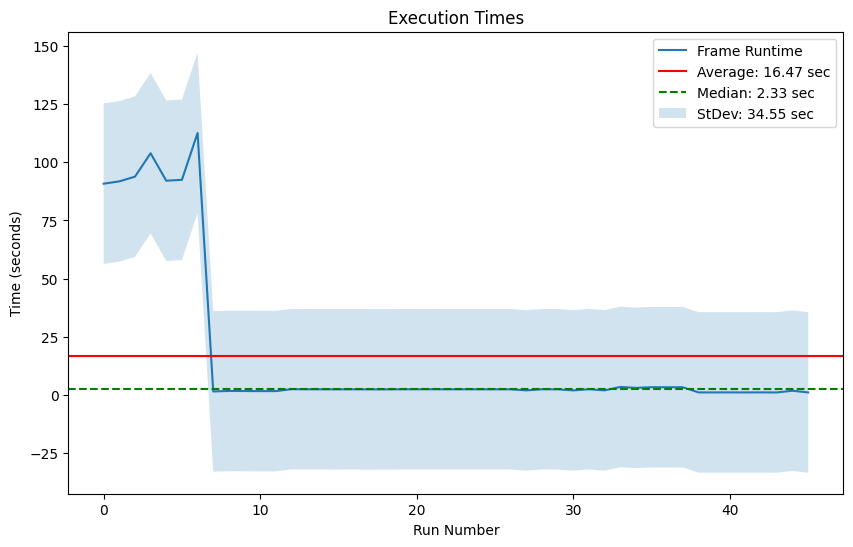

In [21]:

# calculate total time for each pass
pass_times = []
last_total = None
for idx, row in df.iterrows():
    run_value = row['run']
    if (run_value == 0) and (last_total is not None):
        pass_times.append(last_total)
    if (run_value == 0):
        last_total = 0
    last_total += row['time']

avg_time = statistics.mean(pass_times)
median_time = statistics.median(pass_times)
std_time = statistics.stdev(pass_times)


# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(pass_times, label="Frame Runtime")
plt.axhline(y=avg_time, color='r', linestyle='-', label=f'Average: {avg_time:.2f} sec')
plt.axhline(y=median_time, color='g', linestyle='--', label=f'Median: {median_time:.2f} sec')
plt.fill_between(range(len(pass_times)), [t - std_time for t in pass_times], [t + std_time for t in pass_times], alpha=0.2, label=f'StDev: {std_time:.2f} sec')
plt.title('Execution Times')
plt.xlabel('Run Number')
plt.ylabel('Time (seconds)')
plt.yscale('linear')
plt.legend()
plt.show()
